In [146]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Classification tree libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [147]:
# Read the training data set
train_dataset=pd.read_csv("C:\\Sridhar\\AI_ML\\Algorithms\\datasets\\amazon-employee-access-challenge\\train.csv")
test_dataset=pd.read_csv("C:\\Sridhar\\AI_ML\\Algorithms\\datasets\\amazon-employee-access-challenge\\test.csv")

In [148]:
train_dataset.shape,test_dataset.shape

((32769, 10), (58921, 10))

In [149]:
train_dataset.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [150]:
test_dataset.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [151]:
 def memoryManagement(base_dataset):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    df=base_dataset
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))    
    return df

In [152]:
train_dataset = memoryManagement(train_dataset)

Memory usage of dataframe is 2.50 MB
Memory usage after optimization is: 1.16 MB
Decreased by 53.7%


In [153]:
test_dataset = memoryManagement(test_dataset)

Memory usage of dataframe is 4.50 MB
Memory usage after optimization is: 2.25 MB
Decreased by 50.0%


In [154]:
(train_dataset.isna().sum()/train_dataset.shape[0])*100

ACTION              0.0
RESOURCE            0.0
MGR_ID              0.0
ROLE_ROLLUP_1       0.0
ROLE_ROLLUP_2       0.0
ROLE_DEPTNAME       0.0
ROLE_TITLE          0.0
ROLE_FAMILY_DESC    0.0
ROLE_FAMILY         0.0
ROLE_CODE           0.0
dtype: float64

In [155]:
(test_dataset.isna().sum()/test_dataset.shape[0])*100

id                  0.0
RESOURCE            0.0
MGR_ID              0.0
ROLE_ROLLUP_1       0.0
ROLE_ROLLUP_2       0.0
ROLE_DEPTNAME       0.0
ROLE_TITLE          0.0
ROLE_FAMILY_DESC    0.0
ROLE_FAMILY         0.0
ROLE_CODE           0.0
dtype: float64

In [156]:
ids = test_dataset['id']

In [159]:
ids.head()

0    1
1    2
2    3
3    4
4    5
Name: id, dtype: int32

In [158]:
test_dataset.drop('id',axis=1,inplace=True)

In [160]:
test_dataset.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [161]:
test_dataset.shape

(58921, 9)

In [162]:
train_dataset.var()

ACTION              5.454048e-02
RESOURCE            1.167855e+09
MGR_ID              1.290823e+09
ROLE_ROLLUP_1       1.182779e+08
ROLE_ROLLUP_2       2.071696e+07
ROLE_DEPTNAME       3.595318e+08
ROLE_TITLE          9.632622e+08
ROLE_FAMILY_DESC    4.831565e+09
ROLE_FAMILY         1.009792e+10
ROLE_CODE           3.345784e+07
dtype: float64

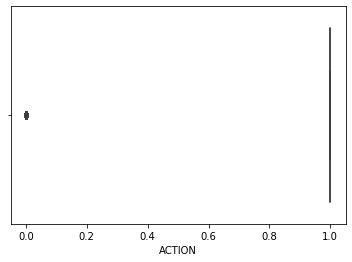

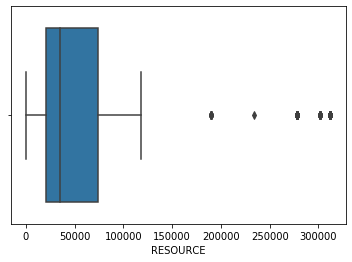

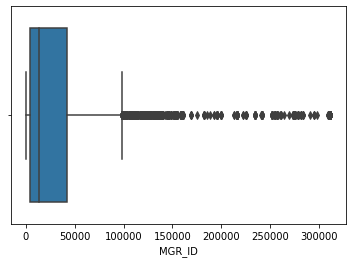

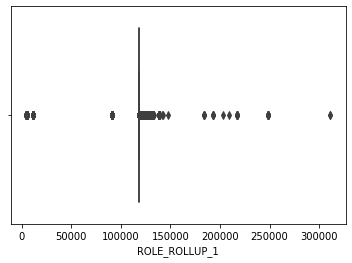

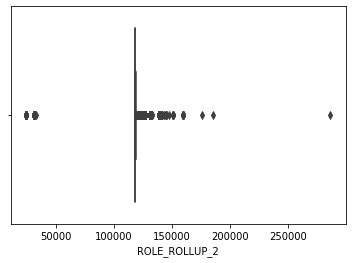

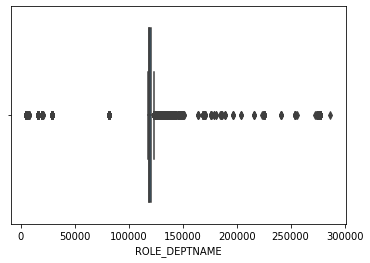

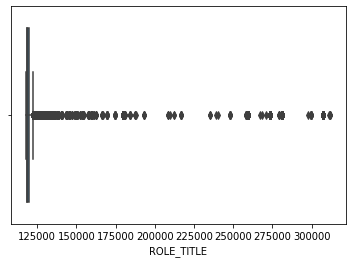

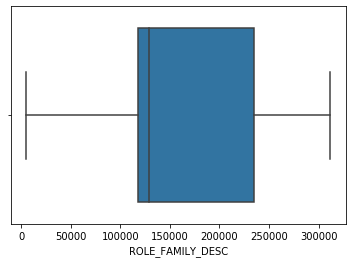

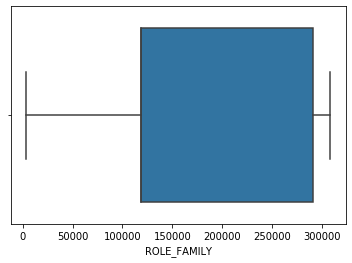

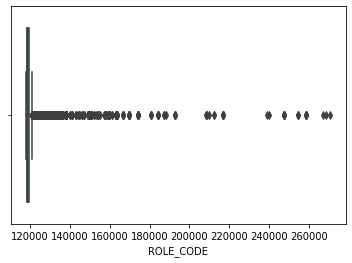

In [163]:
for i in train_dataset.columns:
    sns.boxplot(x=train_dataset[i])
    plt.show()

In [164]:
def outliers_transform(train_dataset):
    for i in train_dataset.var().sort_values(ascending=False).index[1:10]:
        x=np.array(train_dataset[i])
        qr1=np.quantile(x,0.25)
        qr3=np.quantile(x,0.75)
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        y=[]
        """Based on clients input(ltv,utv) run the below code """
        for p in x:
            if p <ltv or p>utv:
                y.append(np.median(x))
            else:
                y.append(p)
        train_dataset[i]=y

In [165]:
outliers_transform(train_dataset)

In [166]:
def outliers_transform1(test_dataset):
    for i in test_dataset.var().sort_values(ascending=False).index[1:10]:
        x=np.array(test_dataset[i])
        qr1=np.quantile(x,0.25)
        qr3=np.quantile(x,0.75)
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        y=[]
        """Based on clients input(ltv,utv) run the below code """
        for p in x:
            if p <ltv or p>utv:
                y.append(np.median(x))
            else:
                y.append(p)
        test_dataset[i]=y

In [167]:
outliers_transform1(test_dataset)

In [168]:
train_dataset.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1.0,39353.0,85475.0,117961.0,118300.0,123472.0,117905.0,117906,290919,117908.0
1,1.0,17183.0,1540.0,117961.0,118343.0,123125.0,118536.0,118536,308574,118539.0
2,1.0,36724.0,14457.0,117961.0,118220.0,117884.0,117879.0,267952,19721,117880.0
3,1.0,36135.0,5396.0,117961.0,118343.0,119993.0,118321.0,240983,290919,118322.0
4,1.0,42680.0,5905.0,117961.0,117930.0,119569.0,119323.0,123932,19793,119325.0


In [169]:
test_dataset.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,78766.0,72734.0,117961.0,118080.0,117878.0,117879.0,118177,19721,117880.0
1,40644.0,4378.0,117961.0,118327.0,118507.0,118863.0,122008,118398,118865.0
2,75443.0,2395.0,117961.0,118300.0,119488.0,118172.0,301534,249618,118175.0
3,43219.0,19986.0,117961.0,118225.0,118403.0,120773.0,136187,118960,120774.0
4,42093.0,50015.0,117961.0,118343.0,119598.0,118422.0,300136,118424,118425.0


In [170]:
y=train_dataset['ACTION']

In [171]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: ACTION, dtype: float64

In [172]:
for i in train_dataset.columns:
    if i !='ACTION':
        sd=StandardScaler()
        sd.fit(pd.DataFrame(train_dataset[i]))
        z=sd.transform(pd.DataFrame(train_dataset[i]))
        train_dataset[i]=z

In [173]:
train_dataset.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1.0,-0.063823,2.855406,0.0,0.353081,3.042009,-0.920474,-0.752030,1.066961,-0.997621
1,1.0,-0.882812,-0.847688,0.0,0.612956,2.786315,-0.220949,-0.742966,1.242656,-0.143599
2,1.0,-0.160942,-0.277808,0.0,-0.130407,-1.075619,-0.949297,1.406645,-1.631879,-1.035517
3,1.0,-0.182700,-0.677566,0.0,0.612956,0.478439,-0.459297,1.018649,1.066961,-0.437296
4,1.0,0.059081,-0.655110,0.0,-1.883050,0.166006,0.651518,-0.665335,-1.631162,0.920206


In [174]:
for i in test_dataset.columns:
    sd=StandardScaler()
    sd.fit(pd.DataFrame(test_dataset[i]))
    z=sd.transform(pd.DataFrame(test_dataset[i]))
    test_dataset[i]=z

In [175]:
test_dataset.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1.715429,2.137835,0.0,-0.970465,-1.089758,-0.957214,-0.750227,-1.601350,-1.022949
1,0.163582,-0.750806,0.0,0.502390,-0.593248,0.123643,-0.695250,-0.611006,0.273740
2,1.580158,-0.834605,0.0,0.341390,0.181119,-0.635373,1.881034,0.705947,-0.634600
3,0.268403,-0.091231,0.0,-0.105833,-0.675342,2.221646,-0.491774,-0.605365,2.786813
4,0.222567,1.177758,0.0,0.597798,0.267949,-0.360765,1.860972,-0.610745,-0.305492


In [176]:
x = train_dataset.drop('ACTION',axis=1)

In [177]:
x.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,-0.063823,2.855406,0.0,0.353081,3.042009,-0.920474,-0.752030,1.066961,-0.997621
1,-0.882812,-0.847688,0.0,0.612956,2.786315,-0.220949,-0.742966,1.242656,-0.143599
2,-0.160942,-0.277808,0.0,-0.130407,-1.075619,-0.949297,1.406645,-1.631879,-1.035517
3,-0.182700,-0.677566,0.0,0.612956,0.478439,-0.459297,1.018649,1.066961,-0.437296
4,0.059081,-0.655110,0.0,-1.883050,0.166006,0.651518,-0.665335,-1.631162,0.920206


In [178]:
y=train_dataset['ACTION']

In [179]:
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: ACTION, dtype: float64

In [180]:
dt = DecisionTreeClassifier()
dt.fit(x,y)
predict_decisionTree = dt.predict(test_dataset)
print(predict_decisionTree)

[1. 1. 1. ... 1. 1. 1.]


In [181]:
dt = RandomForestClassifier()
dt.fit(x,y)
predict_randomForest = dt.predict(test_dataset)
print(predict_randomForest)

[1. 1. 1. ... 1. 1. 1.]


C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
pd.DataFrame(ids,predict_randomForest).to_csv("final_submission_amazon.csv")

In [182]:
dt = BaggingClassifier()
dt.fit(x,y)
predict_bagging = dt.predict(test_dataset)
print(predict_bagging)

[1. 1. 1. ... 1. 1. 1.]


In [183]:
predict_bagging[predict_bagging==0]

array([], dtype=float64)

In [187]:
pd.DataFrame([ids,predict_randomForest]).T.to_csv("final submission_amazon.csv")

In [186]:
ids

0            1
1            2
2            3
3            4
4            5
5            6
6            7
7            8
8            9
9           10
10          11
11          12
12          13
13          14
14          15
15          16
16          17
17          18
18          19
19          20
20          21
21          22
22          23
23          24
24          25
25          26
26          27
27          28
28          29
29          30
         ...  
58891    58892
58892    58893
58893    58894
58894    58895
58895    58896
58896    58897
58897    58898
58898    58899
58899    58900
58900    58901
58901    58902
58902    58903
58903    58904
58904    58905
58905    58906
58906    58907
58907    58908
58908    58909
58909    58910
58910    58911
58911    58912
58912    58913
58913    58914
58914    58915
58915    58916
58916    58917
58917    58918
58918    58919
58919    58920
58920    58921
Name: id, Length: 58921, dtype: int32